'''
Step One - Choose Your Data Set

I chose the Titanic Data – Containing demographics
and passenger information of the 2224 passengers and 
crew who were on board of the Titanic.
'''

'''
Step Two - Get Organized

- report: containing this report about my findings
- code: Python code which I wrote as part of my analysis
- data: Source of data I am going to use
'''

'''
Step Three - Analyze Your Data

1. What kind of people were on board (age, class, embarked etc.)?
2. Has there been a differnce between rich and poor people?
3. What factors made people more likely to survive?

'''

In [1]:
'''
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
'''

'\nVARIABLE DESCRIPTIONS:\nsurvival        Survival\n                (0 = No; 1 = Yes)\npclass          Passenger Class\n                (1 = 1st; 2 = 2nd; 3 = 3rd)\nname            Name\nsex             Sex\nage             Age\nsibsp           Number of Siblings/Spouses Aboard\nparch           Number of Parents/Children Aboard\nticket          Ticket Number\nfare            Passenger Fare\ncabin           Cabin\nembarked        Port of Embarkation\n                (C = Cherbourg; Q = Queenstown; S = Southampton)\n\nSPECIAL NOTES:\nPclass is a proxy for socio-economic status (SES)\n 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower\n\nAge is in Years; Fractional if Age less than One (1)\n If the Age is Estimated, it is in the form xx.5\n\nWith respect to the family relation variables (i.e. sibsp and parch)\nsome relations were ignored.  The following are the definitions used\nfor sibsp and parch.\n\nSibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic\nSpouse:   Husb

In [2]:
# 1. What kind of people were on board (age, class, embarked etc.)?

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandasql as pandasql
import pylab as pylab

import seaborn as sns
import statsmodels.api as sm

train_df = pd.read_csv('../data/train.csv', header=0, dtype={"Age": np.float64},)
test_df = pd.read_csv('../data/test.csv', header=0)

In [4]:
# Check if import of train worked
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Check if import of test worked
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
# Doing a basic description of the data to check for any missing values or "unnorma" behavior 
train_df.describe()

C:\Users\kentc\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'''
count: In column 'Age' there are 177 missing values (n=714)
Mean: The average age is 28.69
Min: The youngest person on board was 0.42 years old
Max: The oldest person on board was 80 years old
'''

AttributeError: 'module' object has no attribute 'show'

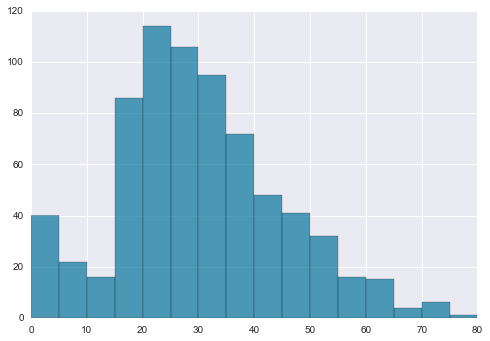

In [8]:
train_df['Age'].dropna().hist(bins=16, range=(0,80), color='#07749d', alpha = .7)
pylab.show()

C:\Users\kentc\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


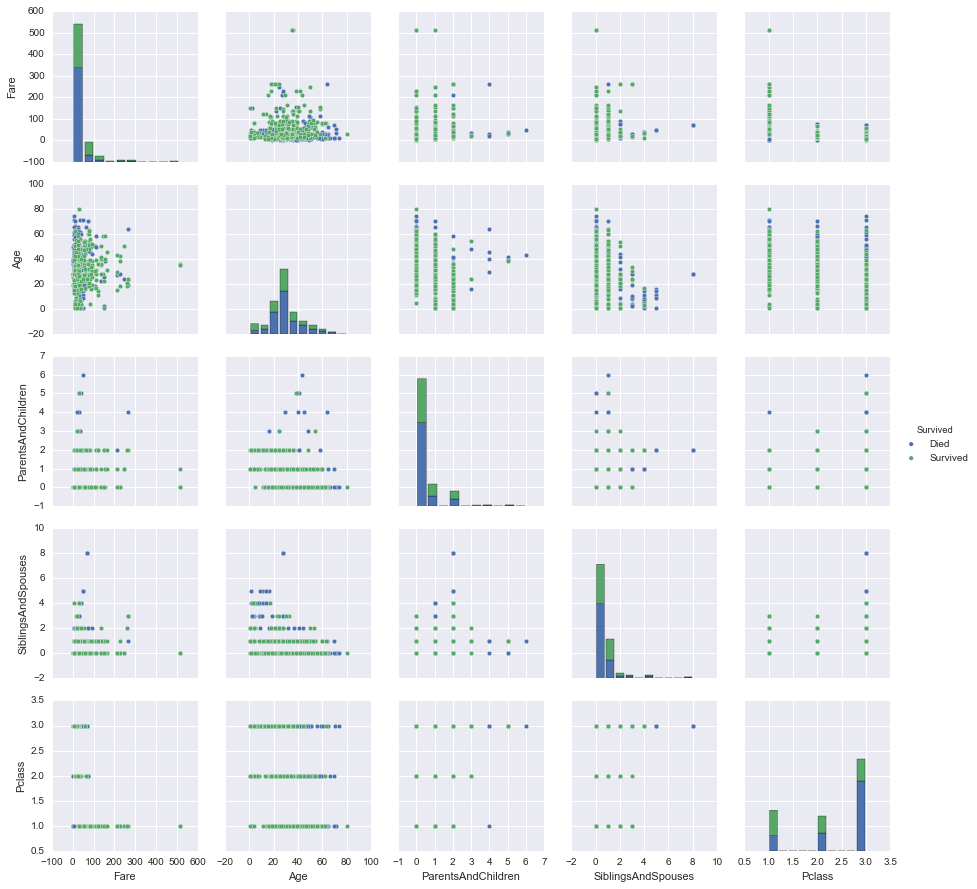

In [11]:
'''
Source
https://www.kaggle.com/benhamner/titanic/python-seaborn-pairplot-example/files
'''
# Replacing missing ages with median
median_age = train_df['Age'].dropna().median()
if len(train_df.Age[ train_df.Age.isnull() ]) > 0:
    train_df.loc[ (train_df.Age.isnull()), 'Age'] = median_age
    
# train_df["Age"][np.isnan(train_df["Age"])] = np.median(train_df["Age"])
train_df["Survived"][train_df["Survived"]==1] = "Survived"
train_df["Survived"][train_df["Survived"]==0] = "Died"
train_df["ParentsAndChildren"] = train_df["Parch"]
train_df["SiblingsAndSpouses"] = train_df["SibSp"]
# print train_df.ix[:,10]
type(train_df)
# display(train_df)
plt.figure()
sns.pairplot(data=train_df[["Sex","Fare","Survived","Age","ParentsAndChildren","SiblingsAndSpouses","Pclass"]],
             hue="Survived", dropna=True)
plt.savefig("1_seaborn_pair_plot.png")


In [12]:
type(train_df['Survived'].sum())
type(train_df['Survived'].count())
summm = train_df['Survived'][train_df['Survived']=='Survived'].count()
print summm
#survivors = train_df['Survived'].sum() / train_df['Survived'].count()
passengers = train_df['Survived'].count()
print (passengers)
print "{} of {} ({}) survived the Titanic".format(int(train_df['Survived'].sum()), train_df['Survived'].count(), survivors)

# only 38.38% of all Titanic passengers survived

342
891


ValueError: invalid literal for int() with base 10: 'DiedSurvivedSurvivedSurvivedDiedDiedDiedDiedSurvivedSurvivedSurvivedSurvivedDiedDiedDiedSurvivedDiedSurvivedDiedSurvivedDiedSurvivedSurvivedSurvivedDiedSurvivedDiedDiedSurvivedDiedDiedSurvivedSurvived'

In [64]:
# 2. Has there been a difference between rich and poor people in order to number of survivors?

def rich_poor(df):
    q = """
    SELECT Pclass, count(Pclass), sum(Survived), count(Pclass)-sum(Survived), sum(Survived)/count(Pclass), sum(Survived)/342. FROM df GROUP BY Pclass;
    """
    return pandasql.sqldf(q.lower(), locals())

rich_poor(train_df)

rich_poor_df = train_df.groupby(['Pclass','Survived']).count()


from IPython.display import display
display(rich_poor_df.reset_index())

for PclassId in xrange(1,4):
    suvivied = rich_poor_df['PassengerId'][PclassId]['Survived']
    total_eachPclass = float(train_df.groupby(['Pclass']).count()['PassengerId'][PclassId])
    print round(suvivied/total_eachPclass,2)

,Pclass,Survived,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParentsAndChildren,SiblingsAndSpouses
0,1,Died,80,80,80,80,80,80,80,80,59,80,80,80
1,1,Survived,136,136,136,136,136,136,136,136,117,134,136,136
2,2,Died,97,97,97,97,97,97,97,97,3,97,97,97
3,2,Survived,87,87,87,87,87,87,87,87,13,87,87,87
4,3,Died,372,372,372,372,372,372,372,372,6,372,372,372
5,3,Survived,119,119,119,119,119,119,119,119,6,119,119,119


0.63
0.47
0.24


'''
Has there been a difference between rich and poor
people in order to number of survivors?

The results show that 62.96% of all 1st class passengers
survived where only 24.23% of all 3rd class passengers
survived.

This could lead to the conlucsion that the higher a persons
class was the more likely she was to survive
'''

In [25]:
# 2. What factors made people more likely to survive?

In [11]:
'''
Adaption of
https://www.kaggle.com/michielkalkman/titanic/kaggle-titanic-001
'''

def harmonize_data(titanic):
    
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()
    
    titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
    
    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic

In [12]:
train_data = harmonize_data(train_df)
test_data  = harmonize_data(test_df)

In [30]:
'''
Source
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html
http://scikit-learn.org/stable/modules/cross_validation.html
'''

from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]


alg    = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, train_data[predictors], train_data["Survived"], cv=3)

print(scores.mean())

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.787878787879
Accuracy: 0.79 (+/- 0.01)


'''
Logistic Regression of predictors ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
compared to effect on Surviving ["Survived"].

This means that with the defined predictors we can answer 78.78% 
of the variance.
'''

In [53]:
'''
Source RandomForestClassifier
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "Fare"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, train_data[predictors], train_data["Survived"], cv=3)

print scores.mean()

0.829405162738


'''
By working with the RandomForestClassifier and cross_validation
The result (0.829405162738) is getting better by removing the 
variables "SibSp", "Parch" and "Embarked".
'''

'''
Step Four - Share Your Findings

My finings are that Titanic passengers would have been very likely to survive if they were in an upper class
and were located near to a Fare. Other imporant factors were the Sex and Age of an person. But these are by
far not all the factors considered. These results are based on the information we had. Information like the
health status, the posession of an life jacket, the time untill rescue or the mental support of other people
are not included in this data and could as well have influence of chance of surviving.

'''

'''
Step Five - Review

Personal conclusion

For me personaly this project was really hard. I was new to python and had to learn all from the beginning
and now working on a real project like this one was especially challenging. I had to make a lot of online
searches and there are hundrets of ways of how to investigate data and how to have a look at them. As it
was described at the beginning, that this will be an endless project, I now - after hours of hours - got 
to a point where I would say I know how it work for a simple data set like this one. But I will have to
invest way more time to learn all the other ways, functions and libraries even better. I really hope this
will come during practicing and further courses.

'''